In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\NIHAL\Documents\GitHub\Air-Quality-EDA-and-Prediction\data\raw\GlobalWeatherRepository.csv')

In [3]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
df.shape

(28536, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       28536 non-null  object 
 1   location_name                 28536 non-null  object 
 2   latitude                      28536 non-null  float64
 3   longitude                     28536 non-null  float64
 4   timezone                      28536 non-null  object 
 5   last_updated_epoch            28536 non-null  int64  
 6   last_updated                  28536 non-null  object 
 7   temperature_celsius           28536 non-null  float64
 8   temperature_fahrenheit        28536 non-null  float64
 9   condition_text                28536 non-null  object 
 10  wind_mph                      28536 non-null  float64
 11  wind_kph                      28536 non-null  float64
 12  wind_degree                   28536 non-null  int64  
 13  w

In [6]:
df.isnull().count()

country                         28536
location_name                   28536
latitude                        28536
longitude                       28536
timezone                        28536
last_updated_epoch              28536
last_updated                    28536
temperature_celsius             28536
temperature_fahrenheit          28536
condition_text                  28536
wind_mph                        28536
wind_kph                        28536
wind_degree                     28536
wind_direction                  28536
pressure_mb                     28536
pressure_in                     28536
precip_mm                       28536
precip_in                       28536
humidity                        28536
cloud                           28536
feels_like_celsius              28536
feels_like_fahrenheit           28536
visibility_km                   28536
visibility_miles                28536
uv_index                        28536
gust_mph                        28536
gust_kph    

In [7]:
print(df.head())

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

In [8]:
df.isnull().values.any()

False

## **Correlation Heatmap**

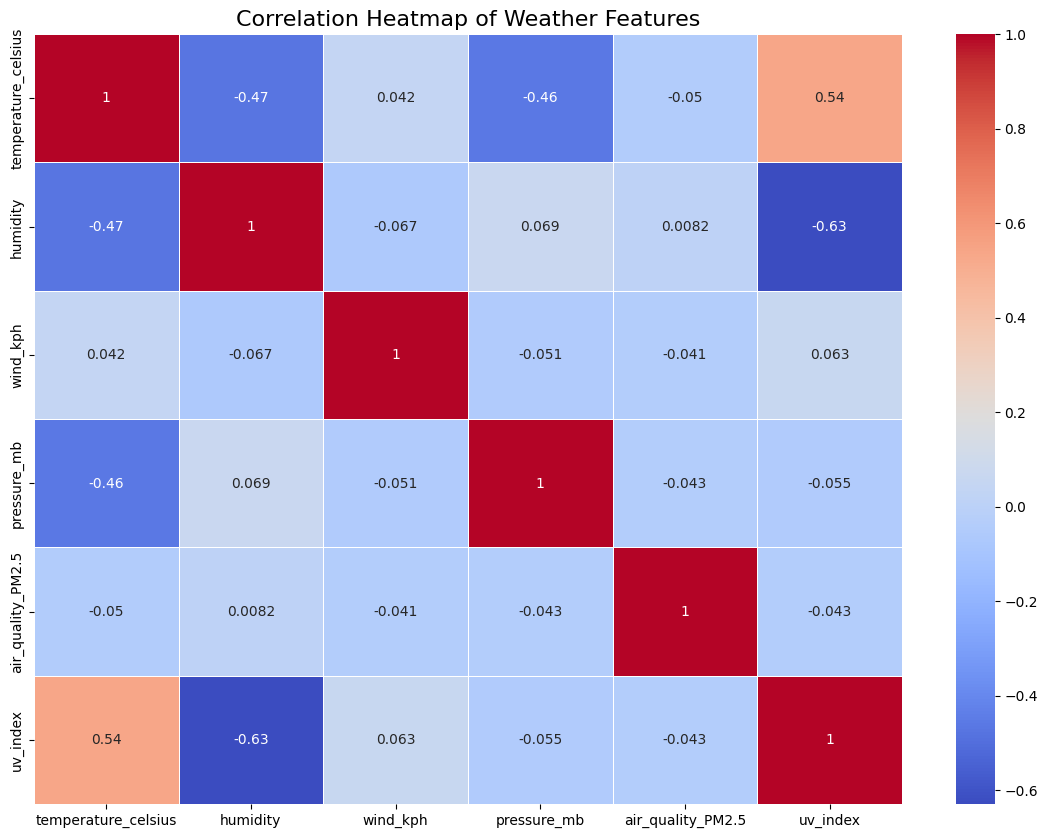

In [9]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'air_quality_PM2.5', 'uv_index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features', fontsize=16)
plt.show()

## **Air Quality (PM2.5) vs Temperature (Celsius)**

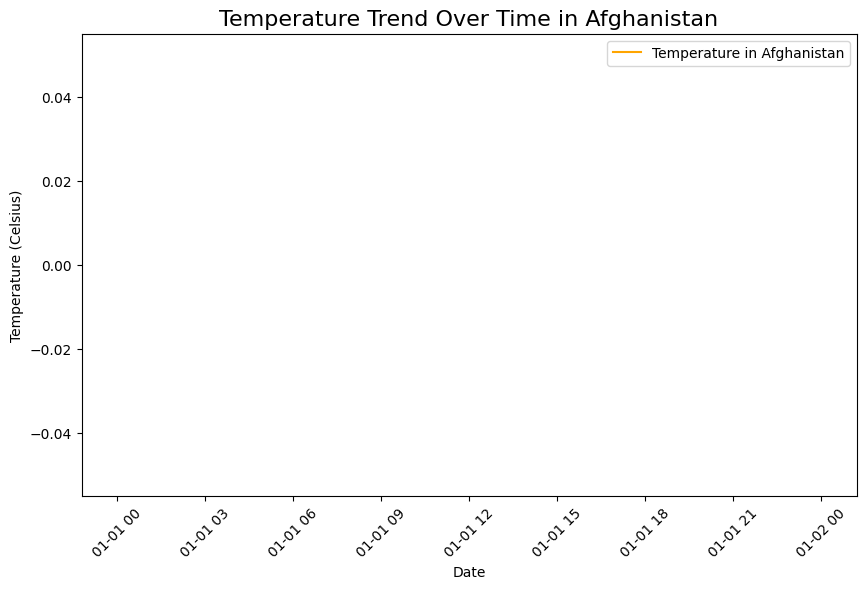

In [10]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

# 1. Temperature Trends Over Time (for a specific location)
location = 'Afghanistan'  # Example location (you can change this)

plt.figure(figsize=(10, 6))
location_data = df[df['location_name'] == location].sort_values('last_updated')
plt.plot(location_data['last_updated'], location_data['temperature_celsius'], label=f"Temperature in {location}", color='orange')
plt.title(f'Temperature Trend Over Time in {location}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<Axes: >

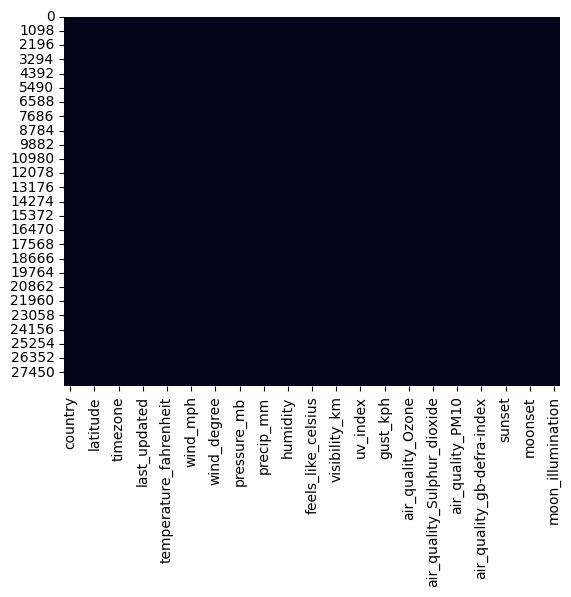

In [13]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)


In [14]:
import missingno as msno
msno.matrix(df)


ModuleNotFoundError: No module named 'missingno'